In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [4]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [45]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
# L(w) = 1/(2*N)*sum((y_n-w_0-w_1*x_n1)^2 = 1/(2*N) e * e^t, eith e = y-Xw
def compute_loss(y, tx, w):
    e = y-tx.dot(w)
    L = 1/(2*np.shape(y)[0])*e.dot(e.T)
    return L

w = np.array([1,2]).T
print('Loss is: {}'.format(compute_loss(y,tx,w)))

Loss is: 2694.483365887084


# 2 Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    
    for i in range(len(w0)):
        for j in range(len(w1)):
            w = np.array([w0[i], w1[j]]).T
            losses[i,j] = compute_loss(y, tx, w)
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=18.79354101952324, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.191 seconds


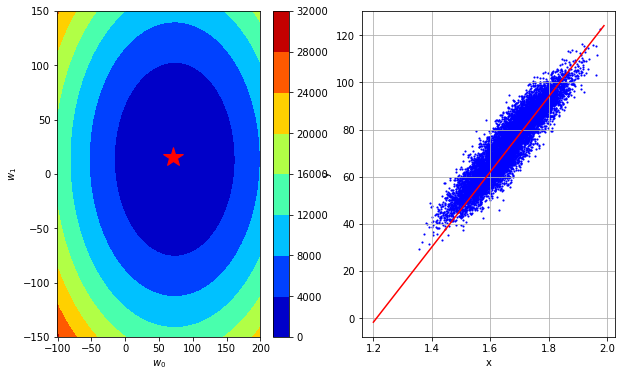

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    e = y-tx.dot(w)
    return -1/(np.shape(y)[0])*tx.T.dot(e)

w_a = np.array([100, 20]).T
w_b = np.array([50, 10]).T

gr_a = compute_gradient(y, tx, w_a)
gr_b = compute_gradient(y, tx, w_b)

print('Gradient for {} is {}'.format(w_a, gr_a)) 
print('Gradient for {} is {}'.format(w_b, gr_b)) 

Gradient for [100  20] is [ 26.706078     6.52028757]
Gradient for [50 10] is [-23.293922    -3.47971243]


Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        grad = compute_gradient(y, tx, w)
        w = w-gamma*grad
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter+1, ti=max_iters, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [9]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.5

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(1/50): loss=2792.236712759167, w0=36.64696100105252, w1=6.739856217494568
Gradient Descent(2/50): loss=709.5985940914163, w0=54.970441501578875, w1=10.109784326241765
Gradient Descent(3/50): loss=188.93906442447587, w0=64.13218175184201, w1=11.794748380615395
Gradient Descent(4/50): loss=58.77418200774123, w0=68.71305187697361, w1=12.637230407802221
Gradient Descent(5/50): loss=26.232961403557322, w0=71.0034869395394, w1=13.058471421395632
Gradient Descent(6/50): loss=18.09765625251138, w0=72.1487044708223, w1=13.269091928192339
Gradient Descent(7/50): loss=16.063829964749893, w0=72.72131323646374, w1=13.374402181590693
Gradient Descent(8/50): loss=15.555373392809523, w0=73.00761761928447, w1=13.42705730828987
Gradient Descent(9/50): loss=15.428259249824428, w0=73.15076981069483, w1=13.453384871639459
Gradient Descent(10/50): loss=15.39648071407816, w0=73.22234590640001, w1=13.466548653314254
Gradient Descent(11/50): loss=15.388536080141593, w0=73.2581339542526, w1=13.

In [10]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>

# 4 Stochastic gradient descent

In [11]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    return compute_gradient(y, tx, w)
    

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        (y_st, tx_st) = [batch for batch in batch_iter(y, tx, batch_size)][0]
        grad = compute_gradient(y_st, tx_st, w)
        w = w-gamma*grad
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter+1, ti=max_iters, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [12]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(1/50): loss=2792.236712759167, w0=52.37536958315756, w1=31.50188827238059
Gradient Descent(2/50): loss=396.5782164778896, w0=70.59279526586737, w1=12.507099447442098
Gradient Descent(3/50): loss=19.506918703211298, w0=71.70195113390311, w1=11.04966321454992
Gradient Descent(4/50): loss=19.60564309830985, w0=74.2876372489632, w1=15.407314898306263
Gradient Descent(5/50): loss=17.73744849304173, w0=75.13950397855749, w1=14.489169866012022
Gradient Descent(6/50): loss=17.59847643725593, w0=73.76904319955378, w1=14.778968328702017
Gradient Descent(7/50): loss=16.342790883635832, w0=73.49052891981364, w1=13.249426309197291
Gradient Descent(8/50): loss=15.431730858740899, w0=71.65511013537163, w1=12.73806699182627
Gradient Descent(9/50): loss=17.003759017784823, w0=71.41372004608576, w1=13.512413834504985
Gradient Descent(10/50): loss=17.1540022573042, w0=69.8100430788232, w1=13.275643118286801
Gradient Descent(11/50): loss=21.475416187883305, w0=70.42183346111578, w1=13.669

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [25]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

y.shape, tx.shape

((202,), (202, 2))

In [26]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.5

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(1/50): loss=2869.8351145358524, w0=37.03390292746318, w1=5.517447432994598
Gradient Descent(2/50): loss=766.9068262109157, w0=55.550854391194775, w1=8.27617114949187
Gradient Descent(3/50): loss=241.1747541296813, w0=64.80933012306056, w1=9.655533007740495
Gradient Descent(4/50): loss=109.74173610937294, w0=69.43856798899347, w1=10.345213936864804
Gradient Descent(5/50): loss=76.88348160429574, w0=71.75318692195992, w1=10.690054401426956
Gradient Descent(6/50): loss=68.66891797802644, w0=72.91049638844315, w1=10.86247463370803
Gradient Descent(7/50): loss=66.61527707145913, w0=73.48915112168476, w1=10.948684749848567
Gradient Descent(8/50): loss=66.10186684481732, w0=73.77847848830557, w1=10.991789807918835
Gradient Descent(9/50): loss=65.97351428815685, w0=73.92314217161596, w1=11.013342336953968
Gradient Descent(10/50): loss=65.94142614899175, w0=73.99547401327116, w1=11.024118601471534
Gradient Descent(11/50): loss=65.93340411420047, w0=74.03163993409876, w1=11.0295

In [27]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>

In [21]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(1/50): loss=2869.8351145358524, w0=53.80970764123725, w1=22.486371277967233
Gradient Descent(2/50): loss=336.69415772738586, w0=67.3776727163605, w1=21.850640371713144
Gradient Descent(3/50): loss=146.7998462307669, w0=71.226504466409, w1=17.626330990155836
Gradient Descent(4/50): loss=91.6907419822838, w0=72.73876422408371, w1=16.70681651673597
Gradient Descent(5/50): loss=82.89925353696535, w0=72.80683781752464, w1=17.33596680925582
Gradient Descent(6/50): loss=86.57750411538926, w0=73.12369595558796, w1=16.281737559191548
Gradient Descent(7/50): loss=80.14108097722371, w0=71.75366666431958, w1=15.668064323923534
Gradient Descent(8/50): loss=79.3414798123227, w0=72.8892625314428, w1=14.593978847063468
Gradient Descent(9/50): loss=72.9587516774373, w0=72.19588472392404, w1=14.289744469169996
Gradient Descent(10/50): loss=72.9797974326133, w0=81.05979817192252, w1=-13.828950878335572
Gradient Descent(11/50): loss=399.48012098185603, w0=88.83079210547305, w1=8.261952659

In [22]:
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [50]:
# L(w) = 1/(2*N)*sum(abs(y_n-w_0-w_1*x_n1)) = 1/N tx.T*sgn(e)
def compute_loss_mae(y, tx, w):
    e = np.abs(y-tx.dot(w))
    L = 1/(np.shape(y)[0])*np.sum(e)
    return L

In [51]:
def compute_gradient_mae(y, tx, w):
    e = y-tx.dot(w)
    w_ = -1/(np.shape(y)[0])*(tx.T).dot(np.sign(e))
    return w_

def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss_mae(y, tx, w)
        grad = compute_gradient_mae(y, tx, w)
        w = w-gamma*grad
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter+1, ti=max_iters, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [63]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 3

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(1/50): loss=73.29392200210518, w0=3.0, w1=-7.912603905424477e-15
Gradient Descent(2/50): loss=70.29392200210518, w0=6.0, w1=-1.5825207810848953e-14
Gradient Descent(3/50): loss=67.29392200210518, w0=9.0, w1=-2.3737811716273432e-14
Gradient Descent(4/50): loss=64.29392200210518, w0=12.0, w1=-3.1650415621697907e-14
Gradient Descent(5/50): loss=61.29392200210518, w0=15.0, w1=-3.956301952712238e-14
Gradient Descent(6/50): loss=58.29392200210518, w0=18.0, w1=-4.747562343254686e-14
Gradient Descent(7/50): loss=55.29392200210517, w0=21.0, w1=-5.538822733797133e-14
Gradient Descent(8/50): loss=52.29392200210518, w0=24.0, w1=-6.330083124339581e-14
Gradient Descent(9/50): loss=49.29392200210518, w0=27.0, w1=-7.121343514882029e-14
Gradient Descent(10/50): loss=46.29392200210518, w0=30.0, w1=-7.912603905424476e-14
Gradient Descent(11/50): loss=43.29404723059966, w0=32.9994, w1=0.001887710444094319
Gradient Descent(12/50): loss=40.295697313622924, w0=35.9976, w1=0.00727655430818749

In [62]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>